## DESIGN OF EXPERIMENT
1: Objective

2: Hypothesis

3: Key metrics

4: Segmentaion and randomization

5: Sample size calculation

6: Develop variants

7: Decide the statistical methods, power, practical boundary

8: Experiment duration calculation

9: Sanity Check (A/A test, Segment Analysis, Learning Effects)

10: Result Analysis and decision making



## Business Background & Questions
This data shows  user's activities on an E-commerce online sales website.

An experiment was launched on day 4 with a goal to increase users' click through rate (clicks/views) and total revenue.

Note: first 3 days no experiment, 4th-14th days experiment running

1. Is the experiment correct? Please note any problems in your report.

2. Did the test version help increase CTR and total revenue? Help the team make the right decisions.

3. There might be learning effect for users to get used to the change. Help the team understand this.

## Experiment Objective 
if the change on the website can increase users' click through rate (clicks/views) and total revenue

## Experiment design
Randomization unit: user; if the data is individual user session, we might want to aggregate them to keep the user granularity uniform

Unit of analysis: click-through-rate (page view)
    
Metrics: views, clicks, revenue

Simple Size: Usually, simple size is determined by practical significance, power of test(1 - β = 0.80), statistical significance(α = 0.05), followed by the formular: (16*(std dev of population))/Difference between treatment and control

Test Duration: Considering the learning effects and weekend day effect, test duration is 2 weeks

Ramp up plan: Considering the browser efficiency, user experience and the goal of the sample size, we can customize the ramp up plan to run our experiment
    
Since we don't know the variables, so we cannot sure the variants, based on the dataset, we assume we have 1 variant which means we have 1 treatment group

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/chenchangping/Desktop/abtest.csv'
df = pd.read_csv(path)

df.head()

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000


In [3]:
df.head(20)

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000
5,3894.0,CN,control,10976,Ios,215,1759,2017-05-12,5,0,0.00000
6,6748.0,GB,control,12300,Other,394,2509,2017-05-12,8,1,0.00000
7,2142.0,CA,treatment,11734,Ios,118,1245,2017-05-12,6,0,0.00000
8,3551.0,GB,control,16864,Ios,168,2463,2017-05-12,5,0,0.00000
9,4008.0,US,treatment,15139,Web,361,1673,2017-05-10,3,0,0.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22960 entries, 0 to 22959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    22685 non-null  float64
 1   country   22960 non-null  object 
 2   groups    22960 non-null  object 
 3   deviceid  22960 non-null  int64  
 4   device    22960 non-null  object 
 5   sellerid  22960 non-null  int64  
 6   itemid    22960 non-null  int64  
 7   date      22960 non-null  object 
 8   views     22960 non-null  int64  
 9   clicks    22960 non-null  int64  
 10  revenue   22960 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.9+ MB


In [5]:
df.describe()

,userid,deviceid,sellerid,itemid,views,clicks,revenue
count,22685.000000,22960.000000,22960.000000,22960.000000,22960.000000,22960.000000,22960.000000
mean,5485.061362,12566.167291,302.175218,1997.914895,5.796211,1.174652,11.974284
std,2583.508693,4366.606560,116.394854,573.823353,2.536716,1.091159,38.136377
min,1000.000000,5000.000000,100.000000,1000.000000,0.000000,0.000000,0.000000
25%,3256.000000,8758.000000,203.000000,1508.000000,4.000000,0.000000,0.000000
50%,5450.000000,12537.500000,304.000000,1994.000000,6.000000,1.000000,0.000000
75%,7717.000000,16409.000000,402.000000,2497.000000,7.000000,2.000000,0.000000
max,10000.000000,20000.000000,500.000000,3000.000000,20.000000,8.000000,1024.124158


In [6]:
print('country : ', df['country'].unique(), ', total number :', df['country'].nunique(), 
     ', groups : ', df['groups'].unique(), ', total number :', df['groups'].nunique(), 
     'device : ', df['device'].unique(), ', total number :', df['device'].nunique())

country :  ['US' 'GB' 'CA' 'CN'] , total number : 4 , groups :  ['control' 'treatment'] , total number : 2 device :  ['Ios' 'Android' 'Other' 'Web'] , total number : 4


In [7]:
df['date'] = pd.to_datetime(df['date'])

minimum_date = min(df['date']) 
maximum_date = max(df['date'])

print(minimum_date,maximum_date)

2017-05-08 00:00:00 2017-05-21 00:00:00


In [8]:
# check the portion of control and treatment segmentation, percentage is even

print('control group:', sum(df['groups'] == 'control'), round(sum(df['groups'] == 'control')/len(df['groups']),2))
print('treatment group:', sum(df['groups'] == 'treatment'), round(sum(df['groups'] == 'treatment')/len(df['groups']),2))

control group: 11460 0.5
treatment group: 11500 0.5


In [9]:
# Explore the dataset 
# check missing value

df.isnull().sum()

userid      275
country       0
groups        0
deviceid      0
device        0
sellerid      0
itemid        0
date          0
views         0
clicks        0
revenue       0
dtype: int64

In [10]:
# mixed units (useris both in control and treatment group)

c = df[df['groups'] == 'control']['userid']
t = df[df['groups'] == 'treatment']['userid']

mixed_units = t[t.isin(c)].count()
mixed_units

77

#### After explored the dataset, we have missing user_id and mixed units problem

1: We can first check if the missing value is correlated with particular variable
    
2: For the mixed users, we can also check why are they in both groups, since we cannot remove them simply


In [11]:
# we first use logistic regression to check if the missing value is related to any variables
# dataframe the missing userid
df['userid_missing'] = df['userid'].isna().astype(int)

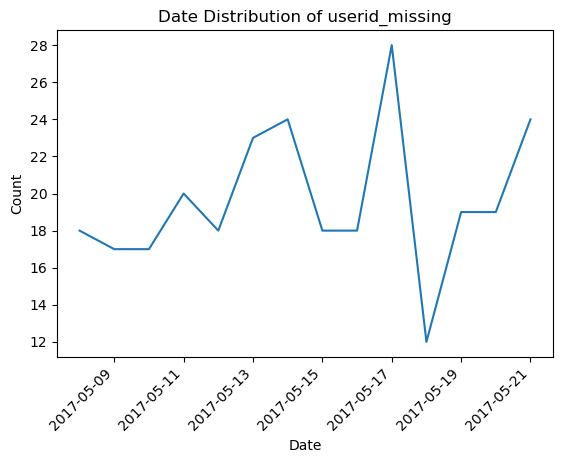

In [12]:
df[df['userid_missing']==1]['date'].value_counts().plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date Distribution of userid_missing')
plt.xticks(rotation=45)
plt.show()
# it seems not related with the date time, so we can drop the date when we do logistic regression

In [13]:
dfdummy = df.copy()
# Make dummy variables for logistic regression

dfdummy = pd.get_dummies(dfdummy[['country','groups','device','views','clicks','revenue','userid_missing']], drop_first=True)

dfdummy

,views,clicks,revenue,userid_missing,country_CN,country_GB,country_US,groups_treatment,device_Ios,device_Other,device_Web
0,5,1,0.00000,0,0,0,1,0,1,0,0
1,3,1,0.00000,0,0,1,0,0,0,0,0
2,8,2,114.09041,0,0,0,0,1,0,1,0
3,4,0,0.00000,0,0,0,1,0,1,0,0
4,4,2,0.00000,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
22955,10,2,0.00000,0,0,1,0,0,1,0,0
22956,6,2,0.00000,0,1,0,0,1,1,0,0
22957,4,1,0.00000,0,0,0,1,1,0,1,0
22958,4,1,0.00000,0,0,0,1,0,0,0,1


In [14]:
dfdummy.isnull().sum()

views               0
clicks              0
revenue             0
userid_missing      0
country_CN          0
country_GB          0
country_US          0
groups_treatment    0
device_Ios          0
device_Other        0
device_Web          0
dtype: int64

In [15]:
# built logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = dfdummy.loc[:,dfdummy.columns != 'userid_missing']
y = dfdummy['userid_missing']

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42 )

model = LogisticRegression(solver='liblinear') 

model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,views,clicks,revenue,country_CN,country_GB,country_US,groups_treatment,device_Ios,device_Other,device_Web
0,-0.01329,0.051017,-0.000811,-0.074366,-0.308795,-0.236564,-0.405663,-0.565514,-0.397167,-0.101345


#### The analysis result as below:

Device Type: iOS users are notably less likely to have missing user IDs. This could be due to more reliable data collection or user behavior differences on iOS devices.

User Engagement: Higher clicks increase the likelihood of missing user IDs, which might suggest issues in how user interactions are tracked or recorded.

Geographic Trends: Users from GB are notably less likely to have missing IDs, which may point to better data completeness or user engagement in that region.

For furthure step, we should follow these three direction to see how to deal with the missing values,
but now we can only remove the missing value from the dataset

We can also use t-test and non parametric test to analyze if the missing user_id is different with non missing user_id on these variables

In [16]:
from scipy.stats import ttest_ind, mannwhitneyu

# Example for a continuous variable 'clicks'
group_missing = df[df['userid_missing'] == 1]['clicks']
group_not_missing = df[df['userid_missing'] == 0]['clicks']

# T-test
t_stat, p_val = ttest_ind(group_missing, group_not_missing)
print(f"clicks T-test p-value: {p_val}")

# Mann-Whitney U Test for non-parametric data
u_stat, p_val_u = mannwhitneyu(group_missing, group_not_missing)
print(f"clicks Mann-Whitney U p-value: {p_val_u}")


clicks T-test p-value: 0.9543708051561873
clicks Mann-Whitney U p-value: 0.9599072465816884


In [17]:
# Example for a continuous variable 'views'
group_missing = df[df['userid_missing'] == 1]['views']
group_not_missing = df[df['userid_missing'] == 0]['views']

# T-test
t_stat, p_val = ttest_ind(group_missing, group_not_missing)
print(f"views clicks T-test p-value: {p_val}")

# Mann-Whitney U Test for non-parametric data
u_stat, p_val_u = mannwhitneyu(group_missing, group_not_missing)
print(f"views clicks Mann-Whitney U p-value: {p_val_u}")

views clicks T-test p-value: 0.8851110861103475
views clicks Mann-Whitney U p-value: 0.7942600059940258


In [18]:
# Example for a continuous variable 'revenue'
group_missing = df[df['userid_missing'] == 1]['revenue']
group_not_missing = df[df['userid_missing'] == 0]['revenue']

# T-test
t_stat, p_val = ttest_ind(group_missing, group_not_missing)
print(f"revenue clicks T-test p-value: {p_val}")

# Mann-Whitney U Test for non-parametric data
u_stat, p_val_u = mannwhitneyu(group_missing, group_not_missing)
print(f"revenue clicks Mann-Whitney U p-value: {p_val_u}")

revenue clicks T-test p-value: 0.9432821079680918
revenue clicks Mann-Whitney U p-value: 0.6374352291628749


In [19]:
import statsmodels.api as sm

# Categorical Variables

# Assuming df is your DataFrame
X = dfdummy[['country_CN', 'country_GB', 'country_US', 'groups_treatment', 'device_Ios', 'device_Other', 'device_Web']]
y = dfdummy['userid_missing']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

result.summary()


Optimization terminated successfully.
         Current function value: 0.064432
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         userid_missing   No. Observations:                22960
Model:                          Logit   Df Residuals:                    22952
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 May 2024   Pseudo R-squ.:                0.007238
Time:                        16:02:33   Log-Likelihood:                -1479.4
converged:                       True   LL-Null:                       -1490.1
Covariance Type:            nonrobust   LLR p-value:                  0.003009
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.0200      0.166    -24.183      0.000      -4.346      -3.694
country_CN          -0.0355      0.188     -0.189      0.850      -0.404       0.333
country_GB          -0.2454      0.198     -1.242      0.214      -0.633       0.142
country_US          -0.0442      0.163     -0.272      0.786      -0.363       0.275
groups_treatment    -0.3903      0.124     -3.159      0.002      -0.632      -0.148
device_Ios          -0.4488      0.188     -2.390      0.017      -0.817      -0.081
device_Other        -0.3552      0.180     -1.969      0.049      -0.709      -0.002
device_Web          -0.0007      0.147     -0.005      0.996      -0.289       0.287
====================================================================================
"""

In [20]:
# based on the result, let's remove the missing value 
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

userid            0
country           0
groups            0
deviceid          0
device            0
sellerid          0
itemid            0
date              0
views             0
clicks            0
revenue           0
userid_missing    0
dtype: int64

In [22]:
# check the mixed units again

# mixed units (useris both in control and treatment group)

c = df[df['groups'] == 'control']['userid']
t = df[df['groups'] == 'treatment']['userid']

mixed_units = t[t.isin(c)]
mixed_units
# the total distinct mixed user id is 77 

90       7176.0
246      8121.0
1206     4403.0
2008     9272.0
2209     9294.0
          ...  
21547    9469.0
21833    2911.0
22278    5343.0
22466    5930.0
22705    8121.0
Name: userid, Length: 77, dtype: float64

In [23]:
df['mixed'] = df['userid'].isin(mixed_units)

df['mixed'] = df['mixed'].astype(int)

In [24]:
df.head()

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue,userid_missing,mixed
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000,0,0
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000,0,0
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041,0,0
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000,0,0
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000,0,0


In [25]:
df[df['mixed']== 1].count()
# the mixed user id is 151 probably because some users are duplicated in different date of the dataset

userid            151
country           151
groups            151
deviceid          151
device            151
sellerid          151
itemid            151
date              151
views             151
clicks            151
revenue           151
userid_missing    151
mixed             151
dtype: int64

In [26]:
dfdummy = df.copy()
# Make dummy variables for logistic regression

dfdummy = pd.get_dummies(dfdummy[['country','groups','device','views','clicks','revenue','userid_missing','mixed']], drop_first=True)

dfdummy

,views,clicks,revenue,userid_missing,mixed,country_CN,country_GB,country_US,groups_treatment,device_Ios,device_Other,device_Web
0,5,1,0.00000,0,0,0,0,1,0,1,0,0
1,3,1,0.00000,0,0,0,1,0,0,0,0,0
2,8,2,114.09041,0,0,0,0,0,1,0,1,0
3,4,0,0.00000,0,0,0,0,1,0,1,0,0
4,4,2,0.00000,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22955,10,2,0.00000,0,0,0,1,0,0,1,0,0
22956,6,2,0.00000,0,0,1,0,0,1,1,0,0
22957,4,1,0.00000,0,0,0,0,1,1,0,1,0
22958,4,1,0.00000,0,0,0,0,1,0,0,0,1


In [27]:
dfdummy.columns

Index(['views', 'clicks', 'revenue', 'userid_missing', 'mixed', 'country_CN',
       'country_GB', 'country_US', 'groups_treatment', 'device_Ios',
       'device_Other', 'device_Web'],
      dtype='object')

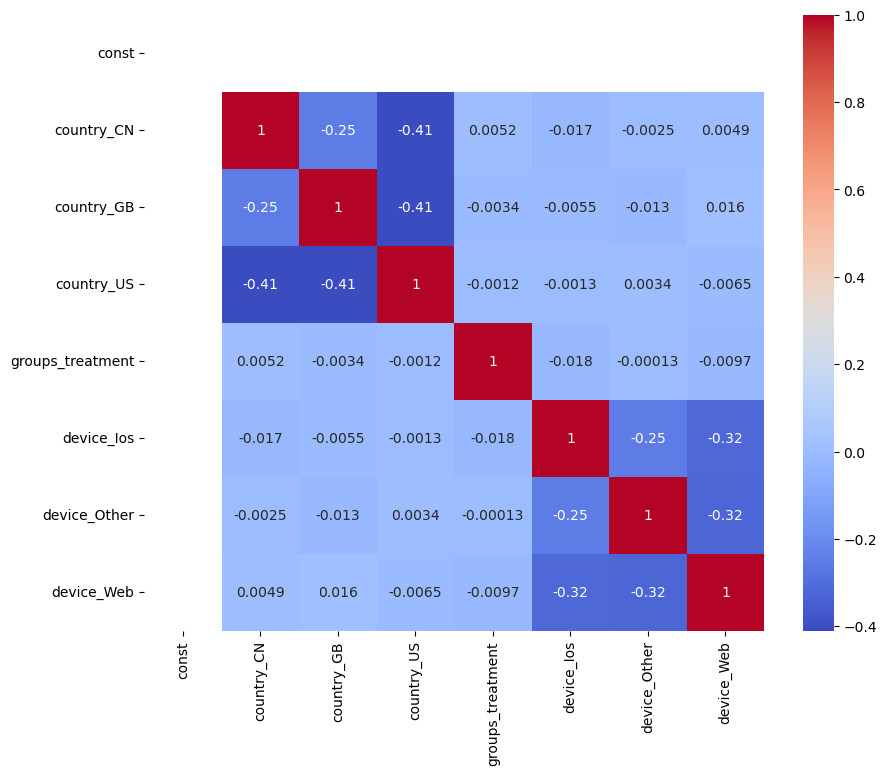

In [29]:
import seaborn as sns


# Another way to explore why the above code has error report. probably because the strong multiculinearity
# Calculate correlation matrix and plot it

plt.figure(figsize=(10,8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

# However, there are no correlation values are very high 

In [30]:
# Try to use logistic regression to identyfy the coefficients

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42 )

model = LogisticRegression(solver='saga', max_iter=1000) # 'saga' is good for handling unstandardized values

model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients


,const,country_CN,country_GB,country_US,groups_treatment,device_Ios,device_Other,device_Web
0,-0.00032,-0.001407,-0.235967,-0.162431,-0.374036,-0.513019,-0.349284,-0.052155


Based on the result, the views are strong relatived with the mixed units, suggesting that the more views the less likely the unit is mixed

In reality we should dive deep to see why is the relations like that, but now we can only discard the mixed values for our 

In [31]:
# remove the mixed units
# Get the indices of mixed units
mixed_indices = mixed_units.index

df_cleaned = df.drop(index=mixed_indices)

In [32]:
df_cleaned['ctr'] = round(df['clicks']/df['views'],2)

In [33]:
df_cleaned.head()

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue,userid_missing,mixed,ctr
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.00000,0,0,0.20
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.00000,0,0,0.33
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.09041,0,0,0.25
3,4326.0,US,control,5329,Ios,431,1471,2017-05-12,4,0,0.00000,0,0,0.00
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.00000,0,0,0.50


In [35]:
df_cleaned.isnull().sum()

userid             0
country            0
groups             0
deviceid           0
device             0
sellerid           0
itemid             0
date               0
views              0
clicks             0
revenue            0
userid_missing     0
mixed              0
ctr               68
dtype: int64

#### Normality Assumption

The normality assumption is the assumption that the data should show a normal distribution when performing a statistical analysis.

Normality Assumption Testing

- H0: The data is normally distributed.
- H1: The data is not normally distributed.
- p-value < 0.05 (H0 REJECTED)
- p-value > 0.05 (H0 IS NOT REJECTED)

In [36]:
#Normality assumption

control = df_cleaned[df_cleaned['groups'] == 'control']['ctr'].dropna()
treatment = df_cleaned[df_cleaned['groups'] == 'treatment']['ctr'].dropna()

In [37]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# Test for control group
stat, p_value = shapiro(control)
print(f'Control Group: Statistics={stat:.3f}, p-value={p_value:.3g}')

# Test for treatment group
stat, p_value = shapiro(treatment)
print(f'Treatment Group: Statistics={stat:.3f}, p-value={p_value:.3g}')


Control Group: Statistics=0.888, p-value=6.05e-67
Treatment Group: Statistics=0.893, p-value=3.5e-66


/var/folders/dk/6jxz72z10dj9tb8f_btwqwth0000gn/T/ipykernel_28365/1095777235.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11261.
  stat, p_value = shapiro(control)
/var/folders/dk/6jxz72z10dj9tb8f_btwqwth0000gn/T/ipykernel_28365/1095777235.py:9: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11279.
  stat, p_value = shapiro(treatment)


Based on the above result, the statistics value is a value closer to 1 indicates a better fit to normal distribution. 

Now both control and treatment group are not good fit to normal distribution and both the p-value are extremely small, so we can reject the null hypothesis that the data is normally distributed, we can also check the normality by using histogram 

In conclusion: the dataset is not normally distributed, we should consider non-parametric method to do A/B testing analysis or using bootstrap method after we finish Homogeneity test

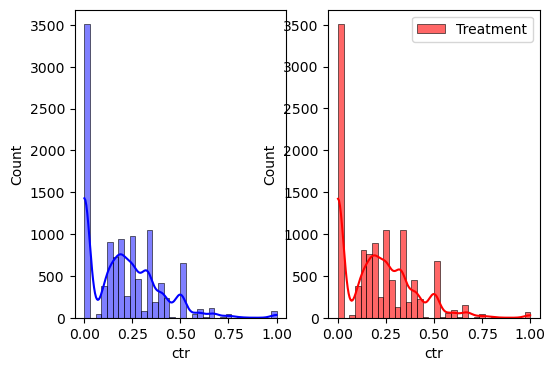

In [38]:
# Histogram
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.histplot(control, kde=True, color='blue', label='Control')

plt.subplot(1, 2, 2)
sns.histplot(treatment, kde=True, color='red', label='Treatment', alpha=0.6)
plt.legend()

# From the graph, we can see it's appearently not normal distribution, 

#### Variance Homogeneity

Variance homogeneity is the assumption that the variances of the measured variables are similar between different groups used in statistical analysis. 


This assumption indicates that different groups are similar and comparable to each other.


H0: Variances are homogeneous.

H1: Variances are not homogeneous

p-value < 0.05 (H0 REJECTED)

p-value > 0.05 (H0 IS NOT REJECTED)

In [39]:
from scipy.stats import levene, ttest_ind

test_stat,pvalue = levene(control,treatment)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.6320, p-value = 0.4266


In [40]:
test_stat,pvalue = levene(control,treatment,center = 'trimmed') # exlude outliers
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# It shows that the dataset was effected by outliers 

Test Stat = 1.6326, p-value = 0.2014


Based on the above result, we cannot reject the null hypothesis that the two groups variances are homogeneous.

So it means that each group spreads out from its mean to a similar extent, which is important for fair and accurate comparisons.

## A/B testing analysis

In [41]:
#Bootstrap method:

def bootstrap_means(control, treatment, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(treatment, size = len(treatment), replace = True),
        sample2 = np.random.choice(control, size = len(control), replace = True)
        
        bootstrap_means.append(np.mean(sample1) - np.mean(sample2))
        
        return  bootstrap_means
    
boot_means = bootstrap_means(control,treatment)
boot_means

[0.007434373376123571]

In [42]:
# Calculate the observed mean difference
observed_mean = np.mean(treatment) - np.mean(control)



# Calculate the p-value as the proportion of bootstrap differences greater than or equal to the absolute observed difference
boot_p_value = np.mean([abs(mean)>= abs(observed_mean) for mean in boot_means])

print('boot_p-value = %.4f' % (boot_p_value))

boot_p-value = 1.0000


In [43]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(control, treatment)
print('Mann-Whitney U Test: Statistics= %.4f' % (stat))
print('Mann-Whitney U Test: P_value= %.4f' % (p_value))

Mann-Whitney U Test: Statistics= 62863433.5000
Mann-Whitney U Test: P_value= 0.1807


Base on boostrap and Mann-Whitney U test result, we fail to reject the null hypothesis, which means the change on the web page is not significantly impact the click through rate and revenue.

### Sanity Check (A/A test)

In [44]:
# calculate the baseline of CTR before running experiment
start_date = '2017-05-08'
end_date = '2017-05-10'
df_base = df_cleaned[(df_cleaned['date'] >= start_date) & (df_cleaned['date'] <= end_date)]
df_base

,userid,country,groups,deviceid,device,sellerid,itemid,date,views,clicks,revenue,userid_missing,mixed,ctr
0,3441.0,US,control,12745,Ios,306,1685,2017-05-09,5,1,0.000000,0,0,0.20
1,3048.0,GB,control,19244,Android,227,2257,2017-05-09,3,1,0.000000,0,0,0.33
2,6640.0,CA,treatment,17198,Other,220,2977,2017-05-10,8,2,114.090410,0,0,0.25
4,6993.0,US,control,15955,Web,399,1812,2017-05-08,4,2,0.000000,0,0,0.50
9,4008.0,US,treatment,15139,Web,361,1673,2017-05-10,3,0,0.000000,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22946,4936.0,CN,treatment,5194,Android,387,1441,2017-05-08,6,1,91.089125,0,0,0.17
22948,5748.0,GB,control,15061,Android,291,1400,2017-05-09,7,1,0.000000,0,0,0.14
22954,9355.0,GB,control,19785,Ios,321,1063,2017-05-10,5,1,0.000000,0,0,0.20
22957,5326.0,US,treatment,8380,Other,466,2062,2017-05-09,4,1,0.000000,0,0,0.25


In [45]:
base_control = df_base[df_base['groups'] == 'control']['ctr'].dropna()
base_treatment = df_base[df_base['groups'] == 'treatment']['ctr'].dropna()

In [46]:
# base_CTR = df_base['clicks'].sum()/df_base['views'].sum()
# control_CTR = df_base[df['groups'] == 'control']['clicks']/
# base_control_CTR = df_base[df['groups'] == 'control']['clicks'].sum()/df_base[df['groups'] == 'control']['views'].sum()
# base_treamtent_CTR = df_base[df['groups'] == 'treatment']['clicks'].sum()/df_base[df['groups'] == 'treatment']['views'].sum()

# print(base_CTR,base_control_CTR,base_treamtent_CTR)

In [47]:
stat, p_value = mannwhitneyu(base_control, base_treatment)
print('Mann-Whitney U Test: Statistics= %.4f' % (stat))
print('Mann-Whitney U Test: P_value= %.4f' % (p_value))

Mann-Whitney U Test: Statistics= 2841396.5000
Mann-Whitney U Test: P_value= 0.9955


In [48]:
# Segment Analysis
# Segement by country

def segment_analysis(column,seg):
    control = df_cleaned[(df_cleaned[column] == seg)&(df_cleaned['groups'] == 'control')]['ctr'].dropna()
    treatment = df_cleaned[(df_cleaned[column] == seg)&(df_cleaned['groups'] == 'treatment')]['ctr'].dropna()
    
    stat, p_value = mannwhitneyu(control, treatment)

    print(f'Segment {seg} Mann-Whitney U Test: Statistics={stat:.2f}')
    print(f'Segment {seg} Mann-Whitney U Test: P_value={p_value:.2f}')
    
segment_analysis('country','CN')    

Segment CN Mann-Whitney U Test: Statistics=2580789.50
Segment CN Mann-Whitney U Test: P_value=0.21


In [49]:
segment_analysis('country','US')  
segment_analysis('country','GB')
segment_analysis('country','CA')  

Segment US Mann-Whitney U Test: Statistics=9991491.50
Segment US Mann-Whitney U Test: P_value=0.17
Segment GB Mann-Whitney U Test: Statistics=2563087.00
Segment GB Mann-Whitney U Test: P_value=0.31
Segment CA Mann-Whitney U Test: Statistics=2432950.00
Segment CA Mann-Whitney U Test: P_value=0.19


In [50]:
segment_analysis('device','Ios')  # based on the result, ios device user has the impact because of the changes
segment_analysis('device','Android') 
segment_analysis('device','Other') 
segment_analysis('device','Web') 

Segment Ios Mann-Whitney U Test: Statistics=2426520.50
Segment Ios Mann-Whitney U Test: P_value=0.00
Segment Android Mann-Whitney U Test: Statistics=5945933.00
Segment Android Mann-Whitney U Test: P_value=0.49
Segment Other Mann-Whitney U Test: Statistics=2648531.50
Segment Other Mann-Whitney U Test: P_value=0.40
Segment Web Mann-Whitney U Test: Statistics=5280185.00
Segment Web Mann-Whitney U Test: P_value=0.73


In [51]:
control = df_cleaned[df_cleaned['groups'] == 'control']['revenue'].dropna()
treatment = df_cleaned[df_cleaned['groups'] == 'treatment']['revenue'].dropna()

stat, p_value = mannwhitneyu(control, treatment)

print(f'Revenue Mann-Whitney U Test: Statistics={stat:.2f}')
print(f'Revenue Mann-Whitney U Test: P_value={p_value:.2f}')
    

Revenue Mann-Whitney U Test: Statistics=64130970.00
Revenue Mann-Whitney U Test: P_value=0.37


In [53]:
df_device=df_cleaned.pivot_table(values='ctr',index='device',columns = 'groups', aggfunc='mean')

df_device.columns=['control_ctr','treatment_ctr']
df_device

,control_ctr,treatment_ctr
device,,
Android,0.198336,0.193794
Ios,0.201921,0.218074
Other,0.198941,0.201544
Web,0.201246,0.204252


Based on the comparison, ios users tend to have a higher ctr when having the change.

Combining mixed data analysis, we can see that iOS users are notably less likely to have missing user IDs. This could be due to more reliable data collection or user behavior differences on iOS devices.

groups       control  treatment
date                           
2017-05-08  0.198868   0.192164
2017-05-09  0.194699   0.197389
2017-05-10  0.188155   0.194744
2017-05-11  0.196978   0.206029
2017-05-12  0.199733   0.192615
2017-05-13  0.194866   0.201108
2017-05-14  0.206764   0.217173
2017-05-15  0.203910   0.205805
2017-05-16  0.201345   0.212240
2017-05-17  0.204476   0.201245
2017-05-18  0.199048   0.203987
2017-05-19  0.208198   0.218844
2017-05-20  0.191301   0.206235
2017-05-21  0.213022   0.192925


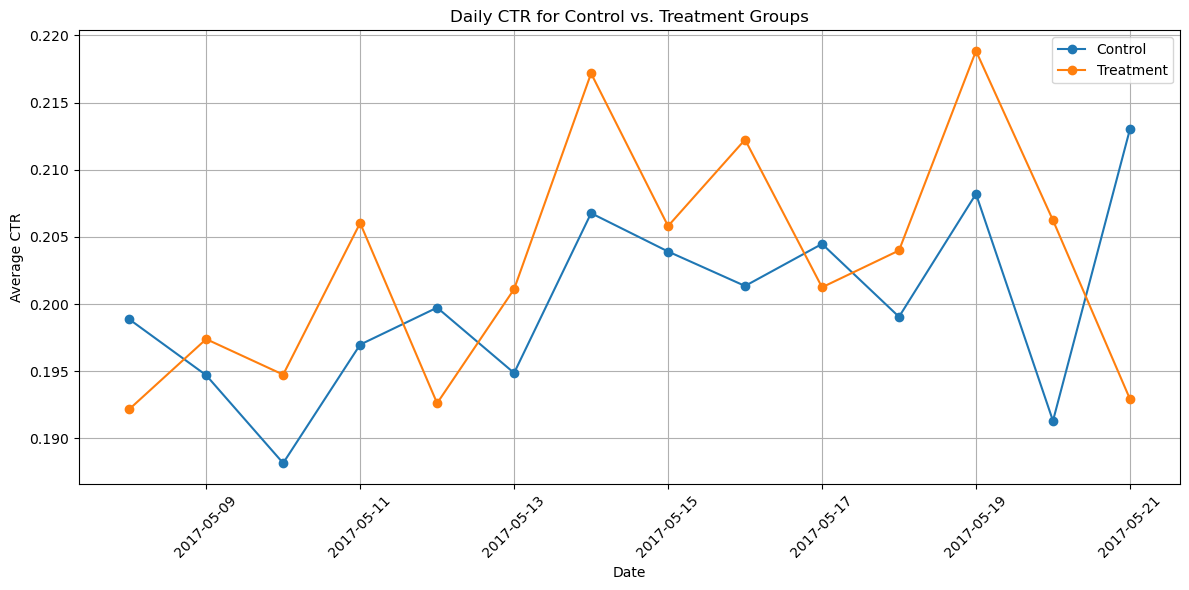

In [56]:
# Learning effect 

# Convert 'date' to datetime if it's not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Group by 'date' and 'groups' and calculate the mean of CTR for each group on each date
grouped_data = df_cleaned.groupby(['date', 'groups'])['ctr'].mean().unstack()

# This will create a DataFrame where the index is the 'date' and columns are 'control' and 'treatment'
print(grouped_data)  # To check the data

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['control'], label='Control', marker='o')
plt.plot(grouped_data.index, grouped_data['treatment'], label='Treatment', marker='o')
plt.title('Daily CTR for Control vs. Treatment Groups')
plt.xlabel('Date')
plt.ylabel('Average CTR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Based on the below result, there is no significance novelty effect among treatment group.
# However, there is a drastic drop when it comes to the end of the experiment, we should dive in to the customer behavior to understand the drop

### Analysis result

According to be A/B testing, we could conclude that the change on webpage does not help increase the click through rate and total revenue
However, in future study, we might want to collect more feedback on ios device users to investigate why does this change can help increase the click through rate among them
